# Capstone Project 1 - Subscription for Bank Deposits 

### General Information on the Data

**Overview**: The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

This dataset is based on "Bank Marketing" UCI dataset (http://archive.ics.uci.edu/ml/datasets/Bank+Marketing). The data are enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb. The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

**Number of Instances**: 41,188

**Number of Attributes**: 20+ output attributes

[Detailed description of data](Data_description.txt)

## Step 1 - Exploratory Data Analysis

**Loading required libraries and the dataset**

In [9]:
#Pandas for dataframes
import pandas as pd
#Changing default display option to display all columns
pd.set_option('display.max_columns', 21)

#Numpy for numerical computing
import numpy as np

#Matplotlib for visualization
import matplotlib.pyplot as plt

#Display plots in the notebook
%matplotlib inline 

#Seaborn for easier visualization
import seaborn as sns

#Stats package for statistical analysis
from scipy import stats

#Machine learning packages
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample

#Loading the data set
df = pd.read_csv('Data/Raw_data/bank-additional-full.csv', sep=';')

**Parameters of the dataset**

In [10]:
#Dropping the duplicates
df = df.drop_duplicates()

#Dataframe dimensions
df.shape

(41176, 21)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null int64
job               41176 non-null object
marital           41176 non-null object
education         41176 non-null object
default           41176 non-null object
housing           41176 non-null object
loan              41176 non-null object
contact           41176 non-null object
month             41176 non-null object
day_of_week       41176 non-null object
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null object
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [12]:
#Selecting categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

#Looping through the columns and changing type to 'category'
for column in categorical_columns:
    df[column] = df[column].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null int64
job               41176 non-null category
marital           41176 non-null category
education         41176 non-null category
default           41176 non-null category
housing           41176 non-null category
loan              41176 non-null category
contact           41176 non-null category
month             41176 non-null category
day_of_week       41176 non-null category
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null category
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null category
dtypes: category(11), float64

In [13]:
#First 10 rows
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
#Last 10 rows
df.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,483,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,151,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,254,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


### Categorical Data

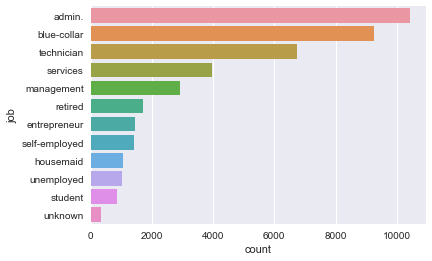

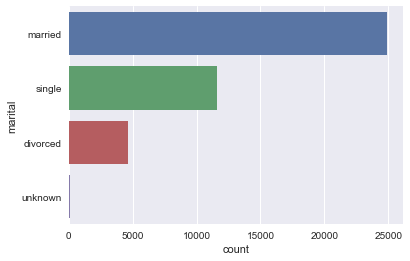

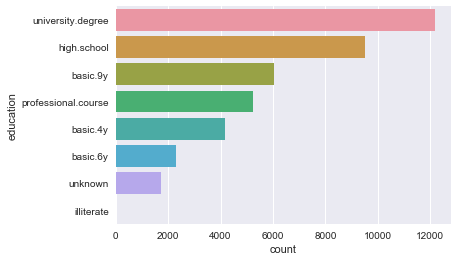

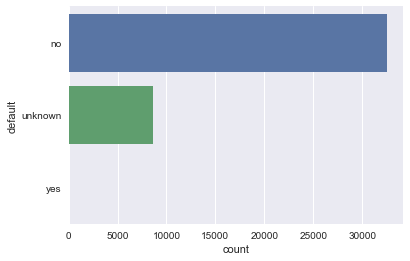

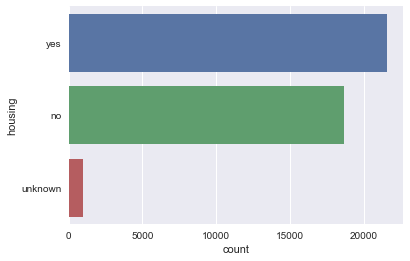

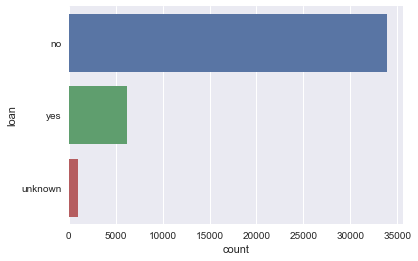

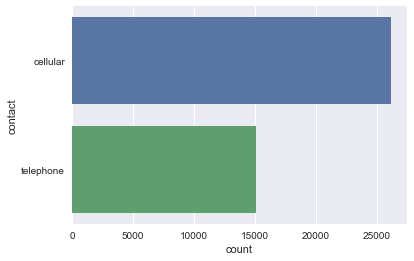

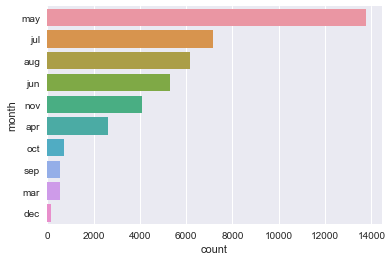

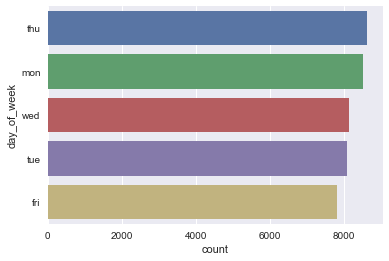

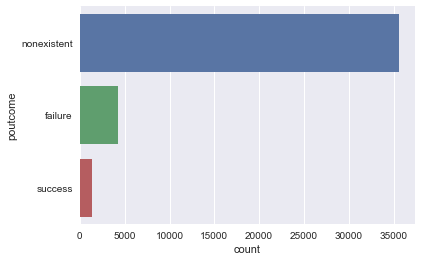

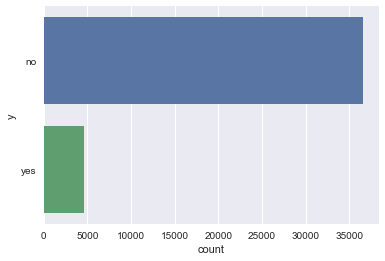

In [15]:
#Bar plots of categorical features
for feature in df.dtypes[df.dtypes == 'category'].index:
    sns.countplot(y=feature, data=df, order = df[feature].value_counts().index)
    plt.show()

In [16]:
#Type of job as proportion of the overall number of values
df.job.value_counts()/df.job.count()

admin.           0.253036
blue-collar      0.224718
technician       0.163663
services         0.096343
management       0.071012
retired          0.041723
entrepreneur     0.035360
self-employed    0.034510
housemaid        0.025743
unemployed       0.024626
student          0.021250
unknown          0.008014
Name: job, dtype: float64

In [17]:
#Marital status as proportion of the overall number of values
df.marital.value_counts()/df.marital.count()

married     0.605231
single      0.280843
divorced    0.111983
unknown     0.001943
Name: marital, dtype: float64

In [18]:
#Education as proportion of the overall number of values
df.education.value_counts()/df.education.count()

university.degree      0.295415
high.school            0.231008
basic.9y               0.146809
professional.course    0.127259
basic.4y               0.101418
basic.6y               0.055639
unknown                0.042015
illiterate             0.000437
Name: education, dtype: float64

In [19]:
#Past defaults on a credit as proportion of the overall number of values
df.default.value_counts()/df.default.count()

no         0.791165
unknown    0.208762
yes        0.000073
Name: default, dtype: float64

In [20]:
#Respondents with housing loans as proportion of the overall number of values
df.housing.value_counts()/df.housing.count()

yes        0.523873
no         0.452084
unknown    0.024043
Name: housing, dtype: float64

In [21]:
#Respondents with personal loans as proportion of the overall number of values
df.loan.value_counts()/df.loan.count()

no         0.824218
yes        0.151739
unknown    0.024043
Name: loan, dtype: float64

In [22]:
#Contact communication type as proportion of the overall number of values
df.contact.value_counts()/df.contact.count()

cellular     0.634714
telephone    0.365286
Name: contact, dtype: float64

In [23]:
#Last contact month as proportion of the overall number of values
df.month.value_counts()/df.month.count()

may    0.334345
jul    0.174106
aug    0.149990
jun    0.129153
nov    0.099573
apr    0.063896
oct    0.017413
sep    0.013843
mar    0.013260
dec    0.004420
Name: month, dtype: float64

In [24]:
#Last contact day as proportion of the overall number of values
df.day_of_week.value_counts()/df.day_of_week.count()

thu    0.209297
mon    0.206722
wed    0.197542
tue    0.196377
fri    0.190062
Name: day_of_week, dtype: float64

In [25]:
#Outcome of the previous campaign as proportion of the overall number of values
df.poutcome.value_counts()/df.poutcome.count()

nonexistent    0.863391
failure        0.103264
success        0.033345
Name: poutcome, dtype: float64

In [26]:
#Outcome of the current campaign as proportion of the overall number of values
df.y.value_counts()/df.y.count()

no     0.887337
yes    0.112663
Name: y, dtype: float64

### Numerical Data

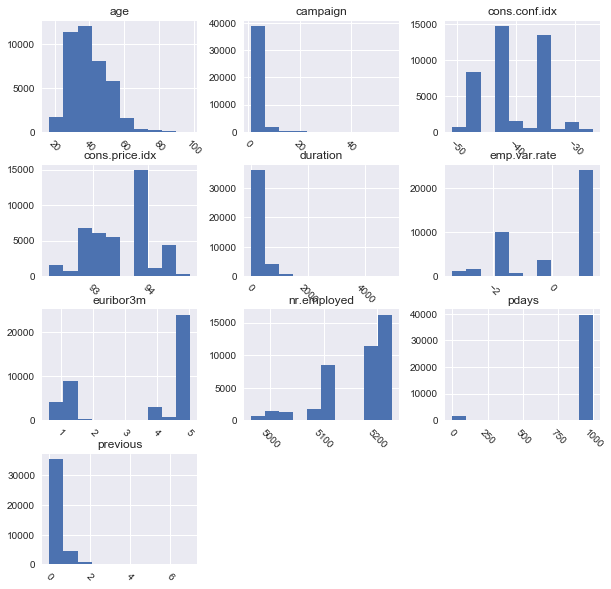

In [27]:
# Histogram grid
df.hist(figsize=(10,10), xrot=-45)

# Clear the text "residue"
plt.show()

In [28]:
#Summary of numeric features
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Data Cleaning and Feature Engineering

In [29]:
#Creating a copy of the original data frame
df_cleaned = df.copy()

#Dropping the unknown job level
df_cleaned = df_cleaned[df_cleaned.job != 'unknown']

#Dropping the unknown marital status
df_cleaned = df_cleaned[df_cleaned.marital != 'unknown']

#Dropping the unknown and illiterate education level
df_cleaned = df_cleaned[df_cleaned.education != 'unknown']
df_cleaned = df_cleaned[df_cleaned.education != 'illiterate']

#Deleting the 'default' column
del df_cleaned['default']

#Deleting the 'duration' column
del df_cleaned['duration']

#Dropping the unknown housing loan status
df_cleaned = df_cleaned[df_cleaned.housing != 'unknown']

#Dropping the unknown personal loan status
df_cleaned = df_cleaned[df_cleaned.loan != 'unknown']

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38216 entries, 0 to 41187
Data columns (total 19 columns):
age               38216 non-null int64
job               38216 non-null category
marital           38216 non-null category
education         38216 non-null category
housing           38216 non-null category
loan              38216 non-null category
contact           38216 non-null category
month             38216 non-null category
day_of_week       38216 non-null category
campaign          38216 non-null int64
pdays             38216 non-null int64
previous          38216 non-null int64
poutcome          38216 non-null category
emp.var.rate      38216 non-null float64
cons.price.idx    38216 non-null float64
cons.conf.idx     38216 non-null float64
euribor3m         38216 non-null float64
nr.employed       38216 non-null float64
y                 38216 non-null category
dtypes: category(10), float64(5), int64(4)
memory usage: 3.3 MB


In [22]:
#Combining entrepreneurs and self-employed into self-employed
df_cleaned.job.replace(['entrepreneur', 'self-employed'], 'self-employed', inplace=True)

#Combining administrative and management jobs into admin_management
df_cleaned.job.replace(['admin.', 'management'], 'administration_management', inplace=True)

#Combining blue-collar and tecnician jobs into blue-collar
df_cleaned.job.replace(['blue-collar', 'technician'], 'blue-collar', inplace=True)

#Combining retired and unemployed into no_active_income
df_cleaned.job.replace(['retired', 'unemployed'], 'no_active_income', inplace=True)

#Combining services and housemaid into services
df_cleaned.job.replace(['services', 'housemaid'], 'services', inplace=True)

#Combining single and divorced into single
df_cleaned.marital.replace(['single', 'divorced'], 'single', inplace=True)

#Combining basic school degrees
df_cleaned.education.replace(['basic.9y', 'basic.6y', 'basic.4y'], 'basic_school', inplace=True)

In [23]:
#Comparing number of entries for 'poutcome' and 'pdays'
a = df_cleaned.poutcome.value_counts()
b = df_cleaned.pdays.value_counts()
print(a['nonexistent'], b[999])

33039 36851


In [24]:
c = df_cleaned.previous.value_counts()
print(c[0])

33039


In [25]:
#Filtering the 'poutcome' and 'pdays' variables
not_matching = df_cleaned.loc[( (df_cleaned['pdays'] == 999) & (df['poutcome'] != 'nonexistent') )]

#Counting the values
not_matching.poutcome.value_counts()

failure        3812
success           0
nonexistent       0
Name: poutcome, dtype: int64

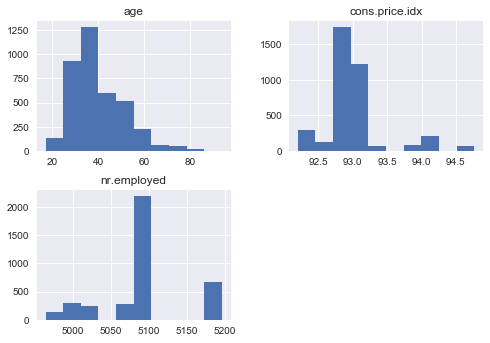

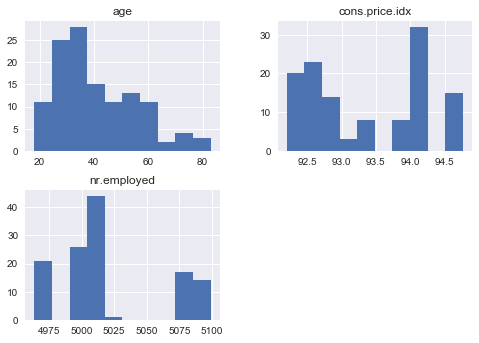

In [26]:
#Filtering for the rows that have 'poutcome' = 'failure' and 'pdays' = '999'
fail_999 = df_cleaned.loc[( (df_cleaned['pdays'] == 999) & (df['poutcome'] == 'failure') )]

#Filtering for 'age' and 'nr.employed' columns only
fail_999 = fail_999.loc[:, ['age', 'nr.employed', 'cons.price.idx']]

#Filtering for the rows that have 'poutcome' = 'failure' and 'pdays' != '999'
fail_no999 = df_cleaned.loc[( (df_cleaned['pdays'] != 999) & (df['poutcome'] == 'failure') )]

#Filtering for 'age', 'nr.employed' and 'cons.price.idx' columns only
fail_no999 = fail_no999.loc[:, ['age', 'nr.employed', 'cons.price.idx']]

#Plotting histograms
fail_999.hist()
fail_no999.hist()
plt.show()

In [27]:
#Getting the positions of the mistakenly labeled 'pdays'
ind_999 = df_cleaned.loc[(df_cleaned['pdays'] == 999) & (df['poutcome'] != 'nonexistent')]['pdays'].index.values

#Assigning NaNs instead of '999'
df_cleaned.loc[ind_999, 'pdays'] = np.nan

#Checking if the NaNs were assigned correctly
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38216 entries, 0 to 41187
Data columns (total 19 columns):
age               38216 non-null int64
job               38216 non-null object
marital           38216 non-null category
education         38216 non-null object
housing           38216 non-null category
loan              38216 non-null category
contact           38216 non-null category
month             38216 non-null category
day_of_week       38216 non-null category
campaign          38216 non-null int64
pdays             34404 non-null float64
previous          38216 non-null int64
poutcome          38216 non-null category
emp.var.rate      38216 non-null float64
cons.price.idx    38216 non-null float64
cons.conf.idx     38216 non-null float64
euribor3m         38216 non-null float64
nr.employed       38216 non-null float64
y                 38216 non-null category
dtypes: category(8), float64(6), int64(3), object(2)
memory usage: 5.0+ MB


In [28]:
#Dropping NAs from the dataset
df_cleaned = df_cleaned.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34404 entries, 0 to 41186
Data columns (total 19 columns):
age               34404 non-null int64
job               34404 non-null object
marital           34404 non-null category
education         34404 non-null object
housing           34404 non-null category
loan              34404 non-null category
contact           34404 non-null category
month             34404 non-null category
day_of_week       34404 non-null category
campaign          34404 non-null int64
pdays             34404 non-null float64
previous          34404 non-null int64
poutcome          34404 non-null category
emp.var.rate      34404 non-null float64
cons.price.idx    34404 non-null float64
cons.conf.idx     34404 non-null float64
euribor3m         34404 non-null float64
nr.employed       34404 non-null float64
y                 34404 non-null category
dtypes: category(8), float64(6), int64(3), object(2)
memory usage: 3.4+ MB


In [29]:
#Saving the cleaned dataset as a file
df_cleaned.to_csv('cleaned_data.csv')

## Statistical analysis

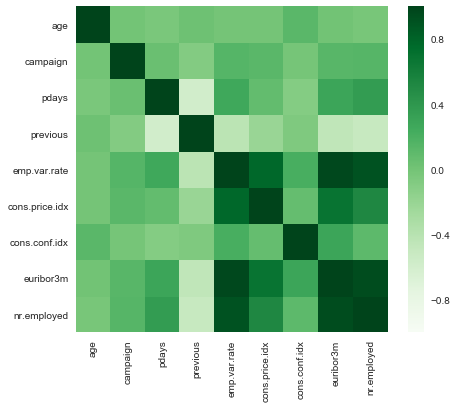

In [33]:
#Calculate correlations between numeric features
correlations = df_cleaned.corr()
#Make the figsize 7 x 6
plt.figure(figsize=(7,6))
#Plot heatmap of correlations
_ = sns.heatmap(correlations, cmap="Greens")

## Fitting the predictive models

In [31]:
#Substituting the string predictor variable values with numbers
df_cleaned.y.replace(['yes'], 1, inplace=True)
df_cleaned.y.replace(['no'], 0, inplace=True)

df_cleaned1 = pd.get_dummies(df_cleaned, drop_first=True)
df_cleaned1.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
1,57,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0


In [32]:
#Splitting the variables into predictor and target variables
X = df_cleaned1.drop('y', axis=1)
y = df_cleaned1.y

#Setting up pipelines with a StandardScaler function to normalize the variables
pipelines = {
    'l1' : make_pipeline(StandardScaler(), 
                         LogisticRegression(penalty='l1' , random_state=42, class_weight='balanced')),
    'l2' : make_pipeline(StandardScaler(), 
                         LogisticRegression(penalty='l2' , random_state=42, class_weight='balanced')),
    #Setting the penalty for simple Logistic Regression as L2 to minimize the fitting time
    'logreg' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=42, class_weight='balanced'))
}

#Setting up a very large hyperparameter C for the non-penalized Logistic Regression (to cancel the regularization)
logreg_hyperparameters = {
    'logisticregression__C' : np.linspace(100000, 100001, 1),
    'logisticregression__fit_intercept' : [True, False]
}

#Setting up hyperparameters for the Logistic Regression with L1 penalty
l1_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10),
    'logisticregression__fit_intercept' : [True, False]
}

#Setting up hyperparameters for the Logistic Regression with L2 penalty
l2_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10),
    'logisticregression__fit_intercept' : [True, False]
}

#Creating the dictionary of hyperparameters
hyperparameters = {
    'logreg' : logreg_hyperparameters,
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters
}

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Creating an empty dictionary for fitted models
fitted_logreg_models = {}

# Looping through model pipelines, tuning each with GridSearchCV and saving it to fitted_logreg_models
for name, pipeline in pipelines.items():
    #Creating cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    #Fitting the model on X_train, y_train
    model.fit(X_train, y_train)
    
    #Storing the model in fitted_logreg_models[name] 
    fitted_logreg_models[name] = model
    
    #Printing the status of the fitting
    print(name, 'has been fitted.')

l2 has been fitted.
logreg has been fitted.
l1 has been fitted.


In [33]:
#Displaying the best_score_ for each fitted model
for name, model in fitted_logreg_models.items():
    print(name, model.best_score_ )

l2 0.838925338427
l1 0.838966863217
logreg 0.838925338427


In [34]:
#Creating an empty dictionary for predicted models
predicted_logreg_models = {}

#Predicting the response variables and displaying the prediction score
for name, model in fitted_logreg_models.items():
    y_pred = model.predict(X_test)
    predicted_logreg_models[name] = accuracy_score(y_test, y_pred)

print(predicted_logreg_models)

{'l1': 0.83811276884324748,
 'l2': 0.83811276884324748,
 'logreg': 0.8380158883937221}

In [35]:
#Defining the model with the highest accuracy score
max(predicted_logreg_models, key=lambda k: predicted_logreg_models[k])

'l2'

In [41]:
#Parameters of the best fitted model
fitted_logreg_models['l2'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=111.11200000000001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [54]:
#Creating the confusion matrix
pd.crosstab(y_test, fitted_logreg_models['l2'].predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,7952,1216,9168
1,455,699,1154
All,8407,1915,10322


In [53]:
#Creating the classification report
print(classification_report(y_test, fitted_logreg_models['l2'].predict(X_test)))

             precision    recall  f1-score   support

          0       0.95      0.87      0.90      9168
          1       0.37      0.61      0.46      1154

avg / total       0.88      0.84      0.85     10322



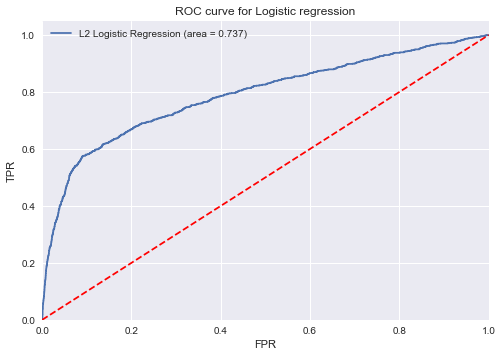

In [69]:
#Obtaining the ROC score
roc_auc = roc_auc_score(y_test, fitted_logreg_models['l2'].predict(X_test))
#Obtaining false and true positives & thresholds
fpr, tpr, thresholds = roc_curve(y_test, fitted_logreg_models['l2'].predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='L2 Logistic Regression (area = %0.03f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Logistic regression')
plt.legend(loc="upper left")
plt.show()

In [72]:
#Defining the model and parameters
final_logreg_model = LogisticRegression(C=111.11200000000001, penalty='l2', class_weight='balanced', random_state=42)
#Defining the parameters of the recursive feature elimination selector. Step=1 means that the selector will remove
#one feature at a time
selector = RFECV(estimator=final_logreg_model, step=1, cv=10, scoring='roc_auc')
selector.fit(X, y)

print('The optimal number of features is {}'.format(selector.n_features_))
features = [f for f,s in zip(X.columns, selector.support_) if s]
print('The selected features are:')
print ('{}'.format(features))

The optimal number of features is 3
The selected features are:
['month_mar', 'poutcome_nonexistent', 'poutcome_success']


In [74]:
#Splitting the variables into predictor and target variables
X_optimized_logreg = df_cleaned1.loc[:, ['month_mar', 'poutcome_nonexistent', 'poutcome_success']]

#Creating a pipeline with the StandardScaler
pipeline = make_pipeline(StandardScaler(), 
                         final_logreg_model)

#Splitting the data into train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_optimized_logreg, y, test_size=0.3, random_state=42)

#Performing a Grid Search over 10 folds
model_optimized_logreg = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)

#Fitting the model
model_optimized_logreg.fit(X_train1, y_train1)
    
print('Model best score: ', model_optimized_logreg.best_score_)
print(classification_report(y_test1, model_optimized_logreg.predict(X_test1)))

Model best score:  0.901004899925
             precision    recall  f1-score   support

          0       0.91      0.98      0.94      9168
          1       0.60      0.28      0.38      1154

avg / total       0.88      0.90      0.88     10322



## Interpreting the L2 logistic regression model

In [63]:
#The intercept of the final model
final_logreg_model.fit(X,y)
final_logreg_model.intercept_

array([-0.02684812])

In [64]:
#Creating a mapping of the values of the coefficients to names
coef_list = {}
for i in range(40):
    coef_list[list(X.columns)[i]] = np.asscalar(pd.DataFrame(final_logreg_model.coef_)[i].values)

#Sorting the resulting dictionary in descending order
sorted(coef_list.items(), key=lambda x: -x[1])

[('month_mar', 1.1259305549317145),
 ('euribor3m', 0.798444740301136),
 ('poutcome_success', 0.7856495132125266),
 ('cons.price.idx', 0.6371614398077847),
 ('month_dec', 0.3203258572861335),
 ('month_aug', 0.3055629907454928),
 ('job_student', 0.25298861980787574),
 ('job_no_active_income', 0.18466774418698276),
 ('month_jul', 0.14807099795724138),
 ('education_university.degree', 0.13008974786880506),
 ('day_of_week_wed', 0.08943229305551763),
 ('education_high.school', 0.07001464328469394),
 ('previous', 0.05067409145265186),
 ('education_professional.course', 0.026603686174141647),
 ('month_oct', 0.01599642509343227),
 ('marital_single', 0.011957440060841637),
 ('job_self-employed', 0.010111462370049456),
 ('poutcome_nonexistent', 0.005341666176947467),
 ('day_of_week_thu', 0.004358990665615383),
 ('loan_unknown', 0.0),
 ('marital_unknown', 0.0),
 ('housing_unknown', 0.0),
 ('pdays', -0.0005315624915834093),
 ('age', -0.0015103732047028588),
 ('loan_yes', -0.003343887922547138),
 ('

### Testing other predictive models

In [75]:
#Setting up pipelines with a StandardScaler function to normalize the variables
pipelines = {
    'rf' : make_pipeline(StandardScaler(), 
                         RandomForestClassifier(random_state=42, class_weight='balanced')),
    'gb' : make_pipeline(StandardScaler(), 
                         GradientBoostingClassifier(random_state=42))
}

#Setting up the "rule of thumb" hyperparameters for the Random Forest
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]
}

#Setting up the "rule of thumb" hyperparameters for the Gradient Boost
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

#Creating the dictionary of hyperparameters
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

#Creating an empty dictionary for fitted models
fitted_alternative_models = {}

# Looping through model pipelines, tuning each with GridSearchCV and saving it to fitted_logreg_models
for name, pipeline in pipelines.items():
    #Creating cross-validation object from pipeline and hyperparameters
    alt_model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    #Fitting the model on X_train, y_train
    alt_model.fit(X_train, y_train)
    
    #Storing the model in fitted_logreg_models[name] 
    fitted_alternative_models[name] = alt_model
    
    #Printing the status of the fitting
    print(name, 'has been fitted.')

rf has been fitted.
gb has been fitted.


In [76]:
#Displaying the best_score_ for each fitted model
for name, model in fitted_alternative_models.items():
    print(name, model.best_score_ )

rf 0.89755834233
gb 0.906361597874


In [77]:
#Creating an empty dictionary for predicted models
predicted_alternative_models = {}

#Predicting the response variables and displaying the prediction score
for name, model in fitted_alternative_models.items():
    y_pred = model.predict(X_test)
    predicted_alternative_models[name] = accuracy_score(y_test, y_pred)

predicted_alternative_models

{'gb': 0.90089130013563268, 'rf': 0.89149389653167987}

In [78]:
#Creating the confusion matrix for Random Forest
pd.crosstab(y_test, fitted_alternative_models['rf'].predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,8854,314,9168
1,806,348,1154
All,9660,662,10322


In [79]:
#Creating the classification report for Random Forest
print(classification_report(y_test, fitted_alternative_models['rf'].predict(X_test)))

             precision    recall  f1-score   support

          0       0.92      0.97      0.94      9168
          1       0.53      0.30      0.38      1154

avg / total       0.87      0.89      0.88     10322



In [80]:
#Creating the confusion matrix for Gradient Boosting
pd.crosstab(y_test, fitted_alternative_models['gb'].predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,8969,199,9168
1,824,330,1154
All,9793,529,10322


In [81]:
#Creating the classification report for Gradient Boosting
print(classification_report(y_test, fitted_alternative_models['gb'].predict(X_test)))

             precision    recall  f1-score   support

          0       0.92      0.98      0.95      9168
          1       0.62      0.29      0.39      1154

avg / total       0.88      0.90      0.88     10322



## Addressing the imbalanced data classes

In [82]:
#Fitting the model
final_logreg_model.fit(X, y)

#Counting the number of the predicted classes
print(np.unique(final_logreg_model.predict(X)))

[0 1]


### An upsampled data set

In [83]:
#Separating the imbalanced observations into 2 separate datasets
df_majority = df_cleaned1[df_cleaned1.y==0]
df_minority = df_cleaned1[df_cleaned1.y==1]

#Upsampling the minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=30622, random_state=42) 

#Concatenating two datasets
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

#New class counts
df_upsampled.y.value_counts()

1    30622
0    30622
Name: y, dtype: int64

In [87]:
#Setting up the new features and the target variable
y_up = df_upsampled.y
X_up = df_upsampled.drop('y', axis=1)

#Defining the model once again
final_model = LogisticRegression(C=111.11200000000001, penalty='l2', class_weight='balanced', random_state=42)

#Defining the steps in order to include the scaler
steps = [('scaler', StandardScaler()),
          ('l2', final_model)]

#Defining the pipeline
pipeline = Pipeline(steps)

#Splitting the data into train and test sets
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up, y_up, test_size=0.3, random_state=42)

#Fitting the model on X_train, y_train
scaled_model = pipeline.fit(X_train_up, y_train_up)

#Predicting the y
y_pred_up = scaled_model.predict(X_test_up)

#Calculating the accuracy score
print(accuracy_score(y_test_up, y_pred_up))

0.737291825405


In [89]:
#Creating the confusion matrix for upsampled model
pd.crosstab(y_test_up, y_pred_up, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,7919,1152,9071
1,3675,5628,9303
All,11594,6780,18374


In [90]:
#Creating the classification report for upsampled model
print(classification_report(y_test_up, y_pred_up))

             precision    recall  f1-score   support

          0       0.68      0.87      0.77      9071
          1       0.83      0.60      0.70      9303

avg / total       0.76      0.74      0.73     18374



In [91]:
#Downsampling the majority class
df_majority_downsampled = resample(df_majority, replace=True, n_samples=3782, random_state=42) 

#Concatenating two datasets
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

#New class counts
df_downsampled.y.value_counts()

1    3782
0    3782
Name: y, dtype: int64

In [99]:
#Setting up the new features and the target variable
y_down = df_downsampled.y
X_down = df_downsampled.drop('y', axis=1)

#Defining the model once again
final_model = LogisticRegression(C=111.11200000000001, penalty='l2', class_weight='balanced', random_state=42)

#Defining the steps in order to include the scaler
steps = [('scaler', StandardScaler()),
          ('l2', final_model)]

#Defining the pipeline
pipeline = Pipeline(steps)

#Splitting the data into train and test sets
X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(X_down, y_down, test_size=0.3, random_state=42)

#Fitting the model on X_train, y_train
scaled_model = pipeline.fit(X_train_down, y_train_down)

#Predicting the y
y_pred_down = pipeline.predict(X_test_down)

#Calculating the accuracy score
print(accuracy_score(y_test_down, y_pred_down))

0.730837004405


In [100]:
#Creating the confusion matrix for downsampled model
pd.crosstab(y_test_down, y_pred_down, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,995,143,1138
1,468,664,1132
All,1463,807,2270


In [101]:
#Creating the classification report for downsampled model
print(classification_report(y_test_down, y_pred_down))

             precision    recall  f1-score   support

          0       0.68      0.87      0.77      1138
          1       0.82      0.59      0.68      1132

avg / total       0.75      0.73      0.73      2270



#### Examining the distributions of numeric variables for the wrongly predicted classes

In [138]:
#Fitting the model to training subset
final_logreg_model.fit(X_train, y_train)

#Predicting y for the training subset
y_train_pred = final_logreg_model.predict(X_train)

#Creating a mask for the respondents with wrongly predicted y=0
mispredicted_0_train_mask = (y_train == 1) & (y_train_pred == 0)
X_train_mispredicted_0 = X_train[mispredicted_0_train_mask]

#Summarizing the distribution of the variables
X_train_mispredicted_0.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
count,1024.000000,1024.000000,1024.0,1024.0,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,...,1024.000000,1024.000000,1024.0,1024.0,1024.000000,1024.000000,1024.000000,1024.000000,1024.0,1024.0
mean,38.910156,2.568359,999.0,0.0,0.582129,93.635015,-41.047949,4.155806,5194.239355,0.422852,...,0.346680,0.108398,0.0,0.0,0.199219,0.186523,0.190430,0.227539,1.0,0.0
std,9.294978,2.196419,0.0,0.0,1.238232,0.499061,3.689892,1.408662,48.393150,0.494254,...,0.476145,0.311035,0.0,0.0,0.399608,0.389719,0.392832,0.419448,0.0,0.0
min,20.000000,1.000000,999.0,0.0,-1.800000,92.756000,-47.100000,1.244000,5099.100000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0
25%,32.000000,1.000000,999.0,0.0,-0.100000,93.200000,-42.700000,4.120000,5191.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0
50%,37.000000,2.000000,999.0,0.0,1.400000,93.918000,-42.000000,4.955000,5228.100000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0
75%,45.000000,3.000000,999.0,0.0,1.400000,93.994000,-36.400000,4.962000,5228.100000,1.000000,...,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0
max,60.000000,23.000000,999.0,0.0,1.400000,94.465000,-36.100000,4.970000,5228.100000,1.000000,...,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.0,0.0


In [139]:
#Creating a mask for the respondents with wrongly predicted y=1
mispredicted_1_train_mask = (y_train == 0) & (y_train_pred == 1)
X_train_mispredicted_1 = X_train[mispredicted_1_train_mask]

#Summarizing the distribution of the variables
X_train_mispredicted_1.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,...,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000
mean,39.972370,1.910025,878.365569,0.191994,-2.132412,93.026864,-41.762026,1.214754,5070.548247,0.302161,...,0.169323,0.047821,0.066596,0.048884,0.235211,0.194474,0.160113,0.220333,0.878498,0.105561
std,12.662548,1.469166,324.437467,0.607051,0.691311,0.542245,6.981648,0.478551,45.072891,0.459276,...,0.375104,0.213426,0.249365,0.215664,0.424206,0.395865,0.366776,0.414545,0.326768,0.307330
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,1.000000,999.000000,0.000000,-2.900000,92.843000,-47.100000,0.879000,5023.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,1.000000,999.000000,0.000000,-1.800000,92.963000,-46.200000,1.281000,5099.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47.000000,2.000000,999.000000,0.000000,-1.800000,93.075000,-37.500000,1.405000,5099.100000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,95.000000,22.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [144]:
#Calculating the differences between the distributions for mispredicted y=1 and y=0
pd.DataFrame(X_train_mispredicted_1.describe()) - pd.DataFrame(X_train_mispredicted_0.describe())

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
count,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,...,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000
mean,1.062214,-0.658335,-120.634431,0.191994,-2.714541,-0.608151,-0.714077,-2.941052,-123.691109,-0.120691,...,-0.177356,-0.060577,0.066596,0.048884,0.035992,0.007951,-0.030316,-0.007206,-0.121502,0.105561
std,3.367570,-0.727253,324.437467,0.607051,-0.546921,0.043183,3.291756,-0.930110,-3.320258,-0.034978,...,-0.101041,-0.097609,0.249365,0.215664,0.024598,0.006146,-0.026056,-0.004904,0.326768,0.307330
min,-3.000000,0.000000,-999.000000,0.000000,-1.600000,-0.555000,-3.700000,-0.609000,-135.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,-1.000000,0.000000,0.000000,0.000000,-2.800000,-0.357000,-4.400000,-3.241000,-167.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.000000,0.000000,0.000000,-3.200000,-0.955000,-4.200000,-3.674000,-129.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,-1.000000,0.000000,0.000000,-3.200000,-0.919000,-1.100000,-3.557000,-129.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,35.000000,-1.000000,0.000000,6.000000,0.000000,0.302000,9.200000,0.075000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [152]:
#Predicting the values on the test subset
X_test = X_test.drop('actual', axis=1)
y_test_pred = final_logreg_model.predict(X_test)

#Creating a mask for the respondents with wrongly predicted y=0
mispredicted_0_test_mask = (y_test == 1) & (y_test_pred == 0)
X_test_mispredicted_0 = X_test[mispredicted_0_test_mask]

#Summarizing the distribution of the variables
X_test_mispredicted_0.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
count,453.000000,453.000000,453.0,453.0,453.000000,453.000000,453.000000,453.00000,453.000000,453.000000,...,453.000000,453.000000,453.0,453.0,453.000000,453.000000,453.000000,453.000000,453.0,453.0
mean,39.556291,2.560706,999.0,0.0,0.571082,93.647940,-41.192274,4.12819,5193.714790,0.373068,...,0.346578,0.094923,0.0,0.0,0.229581,0.225166,0.178808,0.163355,1.0,0.0
std,9.810349,2.268279,0.0,0.0,1.264973,0.515566,3.669035,1.44549,49.654432,0.484155,...,0.476406,0.293432,0.0,0.0,0.421028,0.418153,0.383615,0.370098,0.0,0.0
min,22.000000,1.000000,999.0,0.0,-1.800000,92.893000,-46.200000,1.24400,5099.100000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0
25%,31.000000,1.000000,999.0,0.0,-0.100000,93.200000,-42.700000,4.07600,5191.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0
50%,38.000000,2.000000,999.0,0.0,1.400000,93.918000,-42.000000,4.95700,5228.100000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0
75%,46.000000,3.000000,999.0,0.0,1.400000,93.994000,-36.400000,4.96200,5228.100000,1.000000,...,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0
max,81.000000,17.000000,999.0,0.0,1.400000,94.465000,-36.100000,4.97000,5228.100000,1.000000,...,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.0,0.0


In [153]:
#Creating a mask for the respondents with wrongly predicted y=1
mispredicted_1_test_mask = (y_test == 0) & (y_test_pred == 1)
X_test_mispredicted_1 = X_test[mispredicted_1_test_mask]

#Summarizing the distribution of the variables
X_test_mispredicted_1.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
count,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,...,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000
mean,40.167080,1.863524,869.217535,0.193548,-2.088668,93.042682,-41.784615,1.219170,5069.922663,0.287841,...,0.194376,0.051282,0.072787,0.052109,0.241522,0.188586,0.162117,0.228288,0.869313,0.117452
std,13.407528,1.459861,334.866613,0.590144,0.703994,0.545121,6.976819,0.524998,47.066905,0.452944,...,0.395883,0.220664,0.259895,0.222339,0.428183,0.391341,0.368711,0.419903,0.337197,0.322092
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,1.000000,999.000000,0.000000,-2.900000,92.893000,-47.100000,0.879000,5017.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,36.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-46.200000,1.281000,5099.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47.000000,2.000000,999.000000,0.000000,-1.800000,93.075000,-37.500000,1.405000,5099.100000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,88.000000,19.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
#Calculating the differences between the distributions for mispredicted y=1 and y=0
pd.DataFrame(X_test_mispredicted_1.describe()) - pd.DataFrame(X_test_mispredicted_0.describe())

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.610789,-0.697183,-129.782465,0.193548,-2.659750,-0.605258,-0.592342,-2.909019,-123.792127,-0.085227,...,-0.152203,-0.043641,0.072787,0.052109,0.011941,-0.036580,-0.016690,0.064932,-0.130687,0.117452
std,3.597178,-0.808418,334.866613,0.590144,-0.560979,0.029555,3.307784,-0.920492,-2.587527,-0.031211,...,-0.080523,-0.072769,0.259895,0.222339,0.007155,-0.026812,-0.014904,0.049804,0.337197,0.322092
min,-4.000000,0.000000,-999.000000,0.000000,-1.600000,-0.692000,-4.600000,-0.610000,-135.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-2.800000,-0.307000,-4.400000,-3.197000,-173.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.000000,-1.000000,0.000000,0.000000,-3.200000,-0.843000,-4.200000,-3.676000,-129.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,-1.000000,0.000000,0.000000,-3.200000,-0.919000,-1.100000,-3.557000,-129.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,2.000000,0.000000,7.000000,0.000000,0.302000,9.200000,0.075000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


## Testing the model on the new and existing customers

In [96]:
#Filtering the dataset
new_customers = df_cleaned.loc[df_cleaned['pdays'] == 999]
new_customers.y.value_counts()

0    30121
1     2918
Name: y, dtype: int64

In [97]:
#Generating the prediction-ready dataset
new_customers_cleaned = pd.get_dummies(new_customers, drop_first=True)
new_customers_cleaned.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
1,57,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0


In [102]:
#Setting up the new features and the target variable
y_new = new_customers_cleaned.y
X_new = new_customers_cleaned.drop('y', axis=1)

#Defining the model once again
final_model = LogisticRegression(C=111.11200000000001, penalty='l2', class_weight='balanced', random_state=42)

#Defining the steps in order to include the scaler
steps = [('scaler', StandardScaler()),
          ('l2', final_model)]

#Defining the pipeline
pipeline = Pipeline(steps)

#Splitting the data into train and test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

#Fitting the model on X_train, y_train
scaled_model = pipeline.fit(X_train_new, y_train_new)

#Predicting the y
y_pred_new = pipeline.predict(X_test_new)

#Calculating the accuracy score
print(accuracy_score(y_test_new, y_pred_new))

0.799636803874


In [103]:
#Creating the confusion matrix for new customers subset
pd.crosstab(y_test_new, y_pred_new, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,7432,1589,9021
1,397,494,891
All,7829,2083,9912


In [104]:
#Creating the classification report
print(classification_report(y_test_new, y_pred_new))

             precision    recall  f1-score   support

          0       0.95      0.82      0.88      9021
          1       0.24      0.55      0.33       891

avg / total       0.89      0.80      0.83      9912



In [105]:
#Filtering the dataset
ex_customers = df_cleaned.loc[df_cleaned['pdays'] != 999]
ex_customers.y.value_counts()

1    864
0    501
Name: y, dtype: int64

In [106]:
#Generating the prediction-ready dataset
ex_customers_cleaned = pd.get_dummies(ex_customers, drop_first=True)
ex_customers_cleaned.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
24108,37,1,6.0,1,-0.1,93.2,-42.0,4.286,5195.8,0,...,0,1,0,0,0,0,0,1,0,1
24264,48,1,4.0,1,-0.1,93.2,-42.0,4.191,5195.8,0,...,0,1,0,0,1,0,0,0,0,1
24279,42,1,4.0,1,-0.1,93.2,-42.0,4.191,5195.8,0,...,0,1,0,0,1,0,0,0,0,1
24397,50,1,3.0,1,-0.1,93.2,-42.0,4.191,5195.8,0,...,0,1,0,0,1,0,0,0,0,1
24482,36,2,4.0,1,-0.1,93.2,-42.0,4.191,5195.8,0,...,0,1,0,0,1,0,0,0,0,1


In [107]:
#Setting up the new features and the target variable
y_ex = ex_customers_cleaned.y
X_ex = ex_customers_cleaned.drop('y', axis=1)

#Defining the model once again
final_model = LogisticRegression(C=111.11200000000001, penalty='l2', class_weight='balanced', random_state=42)

#Defining the steps in order to include the scaler
steps = [('scaler', StandardScaler()),
          ('l2', final_model)]

#Defining the pipeline
pipeline = Pipeline(steps)

#Splitting the data into train and test sets
X_train_ex, X_test_ex, y_train_ex, y_test_ex = train_test_split(X_ex, y_ex, test_size=0.3, random_state=42)

#Fitting the model on X_train, y_train
scaled_model = pipeline.fit(X_train_ex, y_train_ex)

#Predicting the y
y_pred_ex = pipeline.predict(X_test_ex)

#Calculating the accuracy score
print(accuracy_score(y_test_ex, y_pred_ex))

0.653658536585


In [108]:
#Creating the confusion matrix for existing customers subset
pd.crosstab(y_test_ex, y_pred_ex, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,94,64,158
1,78,174,252
All,172,238,410


In [109]:
#Creating the classification report
print(classification_report(y_test_ex, y_pred_ex))

             precision    recall  f1-score   support

          0       0.55      0.59      0.57       158
          1       0.73      0.69      0.71       252

avg / total       0.66      0.65      0.66       410

